**Imports and Setup**

In [1]:
pf_id = 2
policies = 5

In [2]:
from ema_workbench import (MultiprocessingEvaluator, SequentialEvaluator)
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)

In [3]:
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.util import ema_logging

from ema_workbench import (ScalarOutcome, Scenario)

ema_logging.log_to_stderr(ema_logging.INFO)

model, planning_steps = get_model_for_problem_formulation(pf_id) #changes for each file



In [4]:
# # don't @ me it has to be set up this way to work
# from ema_workbench import Policy
# policies = [Policy('policy 0', **{'0_RfR 0':0,
#                                   '0_RfR 1':0,
#                                   '0_RfR 2':0,
#                                   'A.1_DikeIncrease 0':0,
#                                   'A.1_DikeIncrease 1':0,
#                                   'A.1_DikeIncrease 2':0,
#                                   '1_RfR 0':0,
#                                   '1_RfR 1':0,
#                                   '1_RfR 2':0,
#                                   'A.2_DikeIncrease 0':0,
#                                   'A.2_DikeIncrease 1':0,
#                                   'A.2_DikeIncrease 2':0,
#                                   '2_RfR 0':0,
#                                   '2_RfR 1':0,
#                                   '2_RfR 2':0,
#                                   'A.3_DikeIncrease 0':0,
#                                   'A.3_DikeIncrease 1':0,
#                                   'A.3_DikeIncrease 2':0,
#                                   '3_RfR 0':0,
#                                   '3_RfR 1':0,
#                                   '3_RfR 2':0,
#                                   'A.4_DikeIncrease 0':0,
#                                   'A.4_DikeIncrease 1':0,
#                                   'A.4_DikeIncrease 2':0,
#                                   '4_RfR 0':0,
#                                   '4_RfR 1':0,
#                                   '4_RfR 2':0,
#                                   'A.5_DikeIncrease 0':0,
#                                   'A.5_DikeIncrease 1':0,
#                                   'A.5_DikeIncrease 2':0,
#                                   'EWS_DaysToThreat':0
#                                   })]
# policies

In [5]:
#this is the base scenario; it's the average of the range of each uncertainty
scenarios = [Scenario('scenario 1', **{'discount rate 0':3,
                                       'discount rate 1':3,
                                       'discount rate 2':3,
                                       'A.1_Bmax' : 190,
                                       'A.1_Brate':1.5,
                                       'A.1_pfail':0.5,
                                       'A.2_Bmax': 190,
                                       'A.2_Brate':1.5,
                                       'A.2_pfail':0.5,
                                       'A.3_Bmax' : 190,
                                       'A.3_Brate':1.5,
                                       'A.3_pfail':0.5,
                                       'A.4_Bmax':190,
                                       'A.4_Brate':1.5,
                                       'A.4_pfail':0.5,
                                       'A.5_Bmax' : 190,
                                       'A.5_Brate':1.5,
                                       'A.5_pfail':0.5,
                                       'A.0_ID flood wave shape' :66})]

reference; If we are searching over levers, what values should we assume for the uncertainties? Reference allows us to specify this. If searchover is set to levers, reference should be a Scenario or None, while if searchover is uncertainties, reference should be a Policy or None. In case of a None, the default values of the underlying model are unchanged

In [6]:

with SequentialEvaluator(model) as evaluator:
    results = evaluator.optimize(nfe=10, searchover='levers', reference=scenarios[0], epsilons=[1, 1, 1, 1, 1])


100it [02:39,  1.60s/it]                                                       
[MainProcess/INFO] optimization completed, found 13 solutions


In [7]:
outcomes = results.loc[:,['Expected Annual Damage','Dike Investment Costs','RfR Investment Costs','Evacuation Costs','Expected Number of Deaths']]
len(outcomes)

13

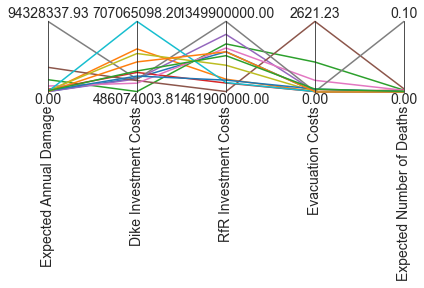

In [8]:
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt

limits = parcoords.get_limits(outcomes)
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes)

# we invert this axis so direction of desirability is the same
#axes.invert_axis('max_P')
plt.show()

In [9]:
outcomes

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,0.000000e+00,5.293593e+08,9.665000e+08,0.000000,0.000000
1,0.000000e+00,6.204577e+08,6.182000e+08,0.000000,0.000000
2,1.592997e+07,4.860740e+08,1.065000e+09,1101.843216,0.002001
3,2.952169e+06,5.462713e+08,5.696000e+08,0.000000,0.002072
4,0.000000e+00,5.260622e+08,1.185700e+09,0.000000,0.000000
5,3.254264e+07,5.206046e+08,4.619000e+08,2621.234185,0.003899
6,7.417049e+06,5.124300e+08,1.012800e+09,418.399262,0.001756
7,9.432834e+07,5.250527e+08,1.349900e+09,0.000000,0.101074
8,1.095018e+06,6.059182e+08,7.950000e+08,0.000000,0.000645
9,0.000000e+00,7.070651e+08,5.755000e+08,0.000000,0.000000


***Save Outputs***

**Narrow Down Using epsilon progress and hypervolume**

In [10]:
model.outcomes = [ScalarOutcome('Expected Annual Damage', kind=ScalarOutcome.MINIMIZE,
                                     expected_range=(0,1e+08)),
                       ScalarOutcome('Dike Investment Costs', kind=ScalarOutcome.MINIMIZE,
                                     expected_range=(0,1e+09)),
                       ScalarOutcome('RfR Investment Costs', kind=ScalarOutcome.MINIMIZE,
                                    expected_range=(0,1e+10)),
                       ScalarOutcome('Evacuation Costs', kind=ScalarOutcome.MINIMIZE,
                                     expected_range=(0,1000)),
                    ScalarOutcome('Expected Number of Deaths', kind=ScalarOutcome.MINIMIZE,
                                     expected_range=(0,.1))]


In [11]:
# convergence = [EpsilonProgress()]
# convergence = [HyperVolume(minimum=[0,0,0,0,0], maximum=[1, 1, 1, 1, 1]),
#                EpsilonProgress()]
convergence = [HyperVolume(minimum=[0,0,0,0,0], maximum=[1e+08, 1e+09, 1e+10, 1000, .1]),
               EpsilonProgress()]

In [12]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

SMALLER = 'SMALLER'


Expected_Annual_Damage = functools.partial(robustness, SMALLER, 0) #THOSE NUMBERS NEED TO BE SPECIFIED AGAINS
Dike_Investment_Costs = functools.partial(robustness, SMALLER, 5.4e8)
RfR_Investment_Costs = functools.partial(robustness, SMALLER, 5.3e8)
Evacuation_Costs = functools.partial(robustness, SMALLER, 0)
Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0) #not ok

In [13]:
MAXIMIZE = ScalarOutcome.MAXIMIZE
MINIMIZE = ScalarOutcome.MINIMIZE

funcs = {"Expected Annual Damage": Expected_Annual_Damage,
         "Dike Investment Costs": Dike_Investment_Costs,
         "RfR Investment Costs": RfR_Investment_Costs,
         "Evacuation Costs": Evacuation_Costs,
         "Expected Number of Deaths": Expected_Number_of_Deaths}

robustness_functions = [ScalarOutcome('Expected Annual Damage', kind=MINIMIZE,
                                     function=Expected_Annual_Damage),
                       ScalarOutcome('Dike Investment Costs', kind=MINIMIZE,
                                     function=Dike_Investment_Costs),
                       ScalarOutcome('RfR Investment Costs', kind=MINIMIZE,
                                     function=RfR_Investment_Costs),
                       ScalarOutcome('Evacuation Costs', kind=MINIMIZE,
                                     function=Evacuation_Costs),
                       ScalarOutcome('Expected Number of Deaths', kind=MINIMIZE,
                                     function=Expected_Number_of_Deaths)
                       ]

In [14]:
epsilons= [1, 1, 1, 1, 1] #[0.125, 0.05, 0.01, 0.01]

In [ ]:
#this is MORO
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.robust_optimize(robustness_functions, scenarios,#nfe=nfe,
                                        convergence=convergence, epsilons=epsilons)

[MainProcess/INFO] pool started with 12 workers
  0%|                                                | 0/10000 [00:00<?, ?it/s]

In [ ]:
#this is MORDM
with MultiprocessingEvaluator(model) as evaluator:
    results, convergence = evaluator.optimize(nfe=10, searchover='levers',
                                              epsilons=epsilons,
                                              convergence=convergence)

**Robustness**

**Robustness Function**

In [ ]:
import functools
import pandas as pd

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

SMALLER = 'SMALLER'

Expected_Annual_Damage = functools.partial(robustness, SMALLER, 1000) #THOSE NUMBERS NEED TO BE SPECIFIED AGAINS
Dike_Investment_Costs = functools.partial(robustness, SMALLER, 1000)
RfR_Investment_Costs = functools.partial(robustness, SMALLER, 1000)
Evacuation_Costs = functools.partial(robustness, SMALLER, 1000)
Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.000001) #not ok

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(10,10),
                        sharex=True)
axes = [axes[0,0],axes[0,1],axes[1,0],axes[1,1]]                             #axes[1,1]

robustness_funcs = {"Expected Annual Damage": Expected_Annual_Damage,
                    "Dike Investment Costs": Dike_Investment_Costs,
                    "RfR Investment Costs": RfR_Investment_Costs,
                    "Evacuation Costs": Evacuation_Costs,
                    "Expected Number of Deaths": Expected_Number_of_Deaths}

experiments, outcomes = results

for ax, (outcome, value) in zip(axes, outcomes.items()):
    for policy in np.unique(experiments['policy']):
        logical = experiments['policy'] == policy
        data = value[logical]
        
        robustness = []
      
        for i in range(1, data.shape[0]):
            robustness.append(robustness_funcs[outcome](data[0:i]))
        ax.plot(robustness, label=policy)

    ax.set_xlabel("# experiments")
    ax.set_ylabel(outcome)